In [37]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [134]:
# load in our dataset, labels and data
iris = datasets.load_iris(as_frame=True)
features    = iris.data
labels      = iris.target
label_names = iris.target_names

# split the data into trainign and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.75, random_state=None)

# show some of the training data
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
125,7.2,3.2,6.0,1.8
0,5.1,3.5,1.4,0.2
40,5.0,3.5,1.3,0.3
14,5.8,4.0,1.2,0.2
99,5.7,2.8,4.1,1.3


In [135]:
# 1: building DT with gini index criterion using only petal width and length

petal_dt = tree.DecisionTreeClassifier()
petal_dt.fit(X_train[['petal width (cm)', 'petal length (cm)']], y_train)

DecisionTreeClassifier()

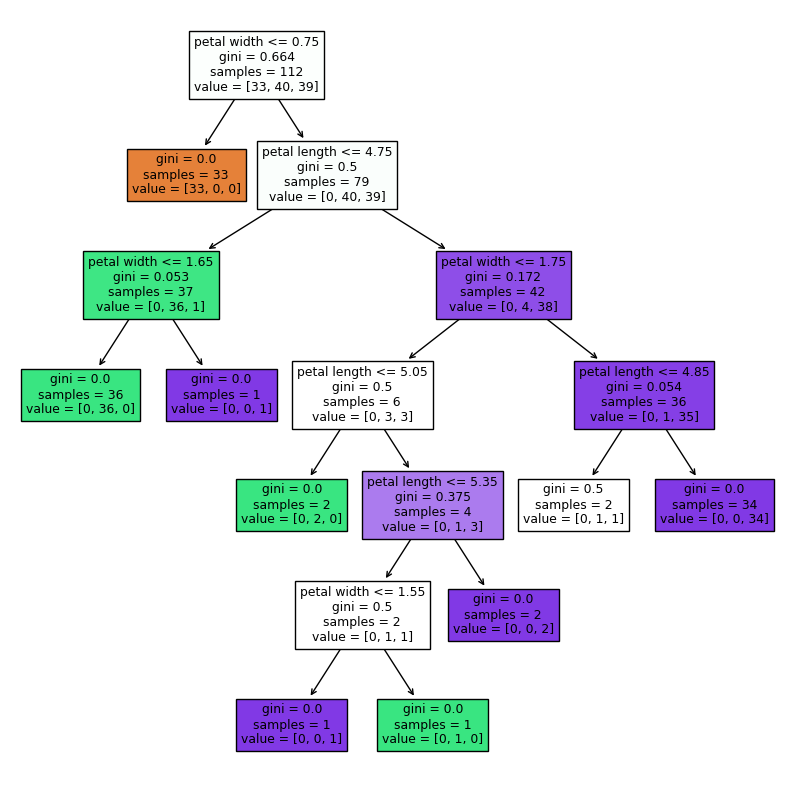

In [136]:
# 2: visualise DT from previous step

plt.figure(figsize=(10, 10))
tree.plot_tree(petal_dt, feature_names = ['petal width', 'petal length'], filled=True)
plt.show()


    Accuracy:  0.9473684210526315
    Precision: 0.9561403508771931
    Recall:    0.9473684210526315
    F1 score:  0.9471291866028708



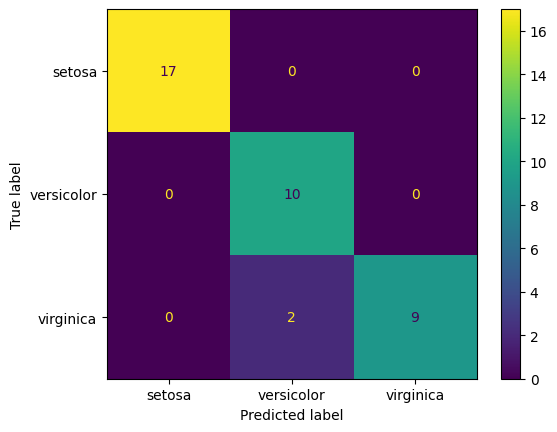

In [137]:
# 3: evalute the model, create confusion matrix, report accuracy, precision, recall, F1 score, overfitting or not, observe tree

y_pred = petal_dt.predict(X_test[['petal width (cm)', 'petal length (cm)']])

# calculate our scores
accu = metrics.accuracy_score (y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred, average='weighted')
reca = metrics.recall_score   (y_test, y_pred, average='weighted')
f1sc = metrics.f1_score       (y_test, y_pred, average='weighted')
print(f'''
    Accuracy:  {accu}
    Precision: {prec}
    Recall:    {reca}
    F1 score:  {f1sc}
''')

# generate confusion matrix and show
petal_cf = metrics.confusion_matrix(y_test, y_pred)
dis = metrics.ConfusionMatrixDisplay(petal_cf, display_labels=label_names)
dis.plot()
plt.show()


In [138]:
# 4: build DT wtih gini index criterion using all variables

full_dt = tree.DecisionTreeClassifier()
full_dt.fit(X_train, y_train)

DecisionTreeClassifier()

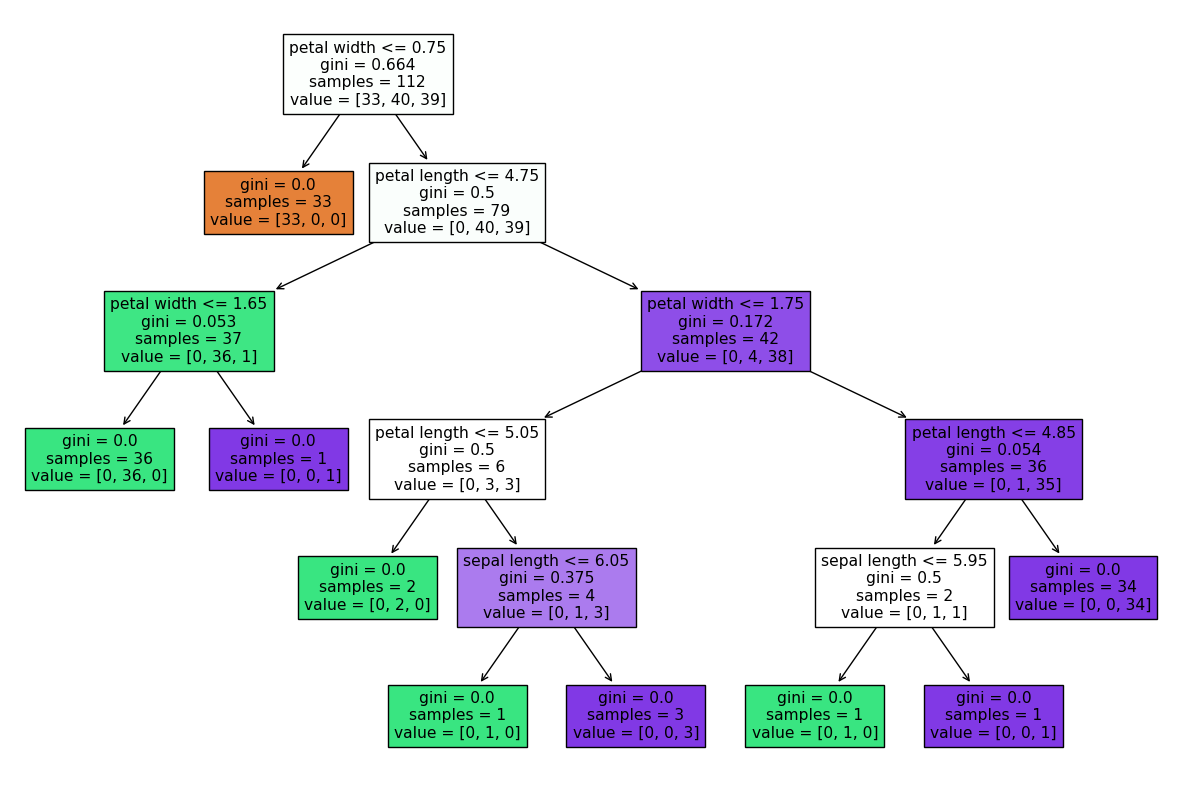

In [139]:
# 5: visualise DT from previous step

plt.figure(figsize=(15, 10))
tree.plot_tree(full_dt, feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'], filled=True)
plt.show()


    Accuracy:  0.9736842105263158
    Precision: 0.9760765550239235
    Recall:    0.9736842105263158
    F1 score:  0.9736842105263158



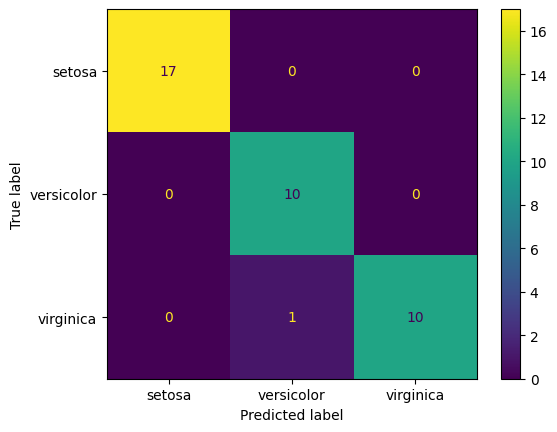

In [140]:
# 6: evaluate the model, give same measures as before, compare to previous model

y_pred = full_dt.predict(X_test)

# calculate our scores
accu = metrics.accuracy_score (y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred, average='weighted')
reca = metrics.recall_score   (y_test, y_pred, average='weighted')
f1sc = metrics.f1_score       (y_test, y_pred, average='weighted')
print(f'''
    Accuracy:  {accu}
    Precision: {prec}
    Recall:    {reca}
    F1 score:  {f1sc}
''')

# generate confusion matrix and show
petal_cf = metrics.confusion_matrix(y_test, y_pred)
dis = metrics.ConfusionMatrixDisplay(petal_cf, display_labels=label_names)
dis.plot()
plt.show()